In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
cd ..

/home/suriya/dcu/Group-Project


# Data

In [3]:
from src.features.basic import features
from src.features.common import postproc_default
from src.dataset.tc4tl import make_datasets
from src.hyperopt import RFP_PARAMS

In [87]:
trainset, devset, testset = make_datasets(features, postproc_default, tunables=RFP_PARAMS, verbose=True, testing=0)

100%|██████████████████████████████████████| 8423/8423 [00:14<00:00, 579.02it/s]


In [88]:
trainset.head()

,RssiMin,RssiPercentile:1,RssiPercentile:5,RssiPercentile:10,RssiPercentile:25,RssiPercentile:40,RssiMean,RssiPercentile:65,RssiPercentile:80,RssiPercentile:90,RssiPercentile:95,RssiPercentile:99,RssiMax,CoarseGrain,fileid,Distance,DistanceFloat
0,-88.0,-79.0,-75.0,-74.0,-67.0,-64.0,-62.133482,-59.0,-54.0,-52.0,-52.0,-50.0,-49.0,0,aaadbuvp_tc4tl20.csv,1.8,1.8
1,-76.0,-76.0,-64.0,-60.0,-57.0,-56.0,-55.255556,-54.0,-50.0,-49.0,-48.0,-48.0,-48.0,1,aaamkcii_tc4tl20.csv,3.0,3.0
2,-89.0,-80.0,-76.6,-75.0,-69.0,-63.0,-62.289089,-57.0,-54.0,-52.0,-51.0,-47.0,-47.0,1,aabqtowt_tc4tl20.csv,1.2,1.2
3,-93.0,-87.0,-83.0,-78.0,-71.0,-68.0,-67.938259,-64.0,-62.0,-61.0,-59.0,-56.0,-53.0,1,aadkjwss_tc4tl20.csv,1.8,1.8
4,-72.0,-70.0,-65.0,-63.0,-58.0,-57.0,-55.760797,-54.0,-51.0,-48.0,-47.0,-46.0,-45.0,0,aafzrgzt_tc4tl20.csv,1.8,1.8


## Evaluate Basic Feature

In [89]:
from src.models.evaluate import dual_evaluation
import pandas as pd

predictors = [ col for col in trainset.columns if 'rssi' in col.lower() or 'coarse' in col.lower() ]
report, sysout = dual_evaluation(pd.concat([trainset, devset]), testset,
                    predictors=predictors,
                    target="Distance")

In [90]:
print(report['cg=0'])

              precision    recall  f1-score   support

         1.8       0.85      0.79      0.82      1423
         4.5       0.80      0.86      0.83      1401

    accuracy                           0.82      2824
   macro avg       0.83      0.82      0.82      2824
weighted avg       0.83      0.82      0.82      2824



In [91]:
print(report['cg=1'])

              precision    recall  f1-score   support

         1.2       0.63      0.63      0.63      1407
         1.8       0.46      0.50      0.48      1408
         3.0       0.54      0.57      0.56      1385
         4.5       0.60      0.53      0.56      1399

    accuracy                           0.56      5599
   macro avg       0.56      0.56      0.56      5599
weighted avg       0.56      0.56      0.56      5599



In [92]:
from src.ndcf import compute_ndcf

ndcf = compute_ndcf(sysout)
ndcf

,Subset,Distance,P_miss,P_fa,nDCF
0,fine_grain,1.2,0.371002,0.121422,0.492424
1,fine_grain,1.8,0.232682,0.267241,0.499923
2,fine_grain,3.0,0.119524,0.466762,0.586286
3,coarse_grain,1.8,0.207309,0.143469,0.350777


In [93]:
ndcf["nDCF"].mean()

0.4823526409739525

### Feature Importance

In [94]:
import matplotlib.pyplot as plt

In [95]:
predictors

['RssiMin',
 'RssiPercentile:1',
 'RssiPercentile:5',
 'RssiPercentile:10',
 'RssiPercentile:25',
 'RssiPercentile:40',
 'RssiMean',
 'RssiPercentile:65',
 'RssiPercentile:80',
 'RssiPercentile:90',
 'RssiPercentile:95',
 'RssiPercentile:99',
 'RssiMax',
 'CoarseGrain']

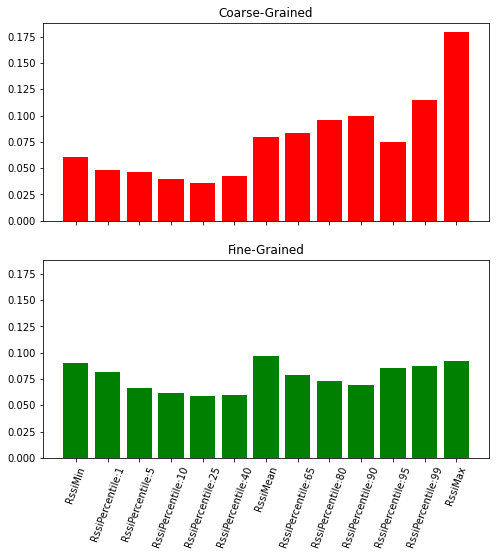

In [98]:
m0, m1 = report["model:cg=0"], report["model:cg=1"]
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(8, 8))
ax0, ax1 = axes.flatten()
ax0.bar(predictors[:-1], m0.feature_importances_[:-1], color="red")
ax0.set_title("Coarse-Grained")
ax0.tick_params(axis='x', rotation=70)
ax1.bar(predictors[:-1], m1.feature_importances_[:-1], color='green')
ax1.set_title("Fine-Grained")
ax1.tick_params(axis='x', rotation=70)

# Percentile Feature Evaluation

In [116]:
from src.features.basic import percentile_features

trainset, devset, testset = make_datasets(percentile_features, postproc_default, tunables=RFP_PARAMS, verbose=True, testing=0)

100%|█████████████████████████████████████| 8423/8423 [00:07<00:00, 1094.91it/s]


In [117]:
trainset.head()

,P:0,P:1,P:2,P:3,P:4,P:5,P:6,P:7,P:8,P:9,...,P:96,P:97,P:98,P:min,P:max,P:mean,CoarseGrain,fileid,Distance,DistanceFloat
0,-79.0,-77.00,-76.09,-75.0,-75.0,-75.0,-75.0,-74.00,-74.0,-74.0,...,-51.0,-51.0,-50.0,-88.0,-49.0,-62.133482,0,aaadbuvp_tc4tl20.csv,1.8,1.8
1,-76.0,-67.42,-64.33,-64.0,-64.0,-64.0,-64.0,-63.52,-60.0,-60.0,...,-48.0,-48.0,-48.0,-76.0,-48.0,-55.255556,1,aaamkcii_tc4tl20.csv,3.0,3.0
2,-80.0,-78.00,-78.00,-77.0,-76.6,-76.0,-76.0,-75.00,-75.0,-75.0,...,-50.0,-49.0,-47.0,-89.0,-47.0,-62.289089,1,aabqtowt_tc4tl20.csv,1.2,1.2
3,-87.0,-86.00,-85.00,-84.0,-83.0,-83.0,-81.0,-80.00,-78.0,-78.0,...,-58.0,-57.0,-56.0,-93.0,-53.0,-67.938259,1,aadkjwss_tc4tl20.csv,1.8,1.8
4,-70.0,-67.00,-67.00,-66.0,-65.0,-65.0,-65.0,-64.00,-63.0,-63.0,...,-47.0,-46.0,-46.0,-72.0,-45.0,-55.760797,0,aafzrgzt_tc4tl20.csv,1.8,1.8


In [118]:
from src.models.evaluate import dual_evaluation
import pandas as pd

predictors = [ col for col in trainset.columns if 'p:' in col.lower() or 'coarse' in col.lower() ]
report, sysout = dual_evaluation(pd.concat([trainset, devset]), testset,
                    predictors=predictors,
                    target="Distance")

In [119]:
print(report["cg=0"])

              precision    recall  f1-score   support

         1.8       0.86      0.80      0.83      1423
         4.5       0.81      0.87      0.84      1401

    accuracy                           0.83      2824
   macro avg       0.83      0.83      0.83      2824
weighted avg       0.83      0.83      0.83      2824



In [120]:
print(report["cg=1"])

              precision    recall  f1-score   support

         1.2       0.64      0.60      0.62      1407
         1.8       0.48      0.50      0.49      1408
         3.0       0.55      0.60      0.57      1385
         4.5       0.57      0.53      0.55      1399

    accuracy                           0.56      5599
   macro avg       0.56      0.56      0.56      5599
weighted avg       0.56      0.56      0.56      5599



In [121]:
from src.ndcf import compute_ndcf

ndcf = compute_ndcf(sysout)
ndcf

,Subset,Distance,P_miss,P_fa,nDCF
0,fine_grain,1.2,0.400142,0.114027,0.514169
1,fine_grain,1.8,0.250089,0.247486,0.497574
2,fine_grain,3.0,0.131190,0.469621,0.600812
3,coarse_grain,1.8,0.199578,0.134190,0.333768


In [122]:
ndcf["nDCF"].mean()

0.48658079005712607

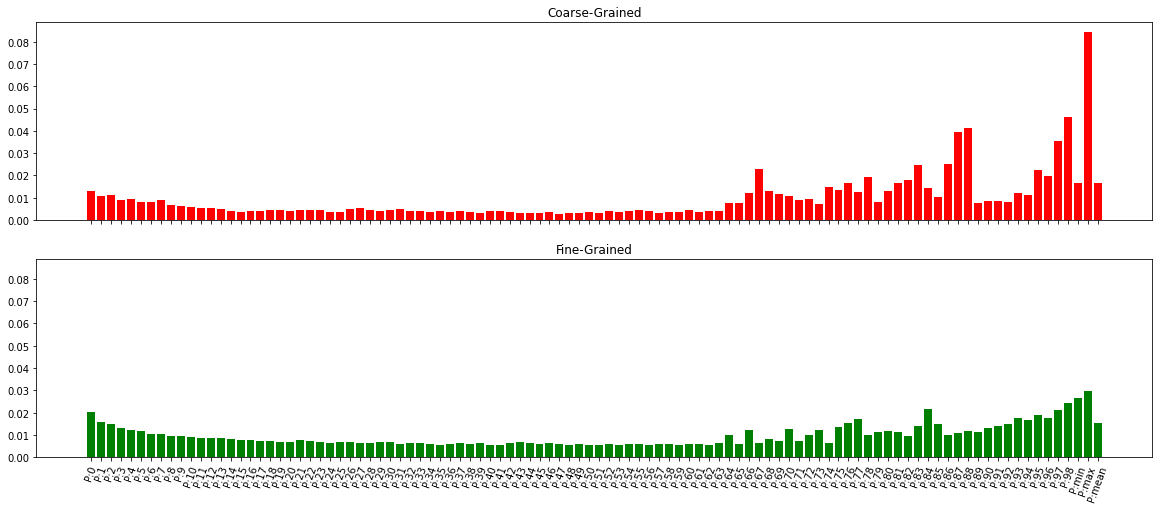

In [123]:
m0, m1 = report["model:cg=0"], report["model:cg=1"]
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(20, 8))
ax0, ax1 = axes.flatten()
ax0.bar(predictors[:-1], m0.feature_importances_[:-1], color="red")
ax0.set_title("Coarse-Grained")
ax0.tick_params(axis='x', rotation=70)
ax1.bar(predictors[:-1], m1.feature_importances_[:-1], color='green')
ax1.set_title("Fine-Grained")
ax1.tick_params(axis='x', rotation=70)

## Add Linear Approximation Distance Estimate as feature

In [4]:
from src.features import radioprop
from src.featutils import compose
from src.features.common import postproc_basic

def f2(feats, tunables={}):
    for name in ["RssiMin", "RssiMax", "RssiMean"]:
        rssi = feats[name]
        distance = radioprop.linear_approximation_model(rssi, **tunables["LinearApprox"])
        feats[name + "Distance"] = distance
    return feats

trainset, devset, testset = make_datasets(compose(features, f2), postproc_basic,
                                          tunables=RFP_PARAMS, verbose=True, testing=0)

100%|██████████████████████████████████████| 8423/8423 [00:12<00:00, 653.88it/s]


In [5]:
trainset.head()

,RssiMin,RssiMax,RssiMean,RssiMinDistance,RssiMaxDistance,RssiMeanDistance,CoarseGrain,fileid,Distance,DistanceFloat
0,0.383333,0.128713,0.343245,0.087135,0.064738,0.139819,0,aaadbuvp_tc4tl20.csv,1.8,1.8
1,0.583333,0.133663,0.470944,0.023335,0.058268,0.065995,1,aaamkcii_tc4tl20.csv,3.0,3.0
2,0.366667,0.138614,0.340356,0.097011,0.052445,0.142186,1,aabqtowt_tc4tl20.csv,1.2,1.2
3,0.300000,0.108911,0.235470,0.148762,0.098641,0.260539,1,aadkjwss_tc4tl20.csv,1.8,1.8
4,0.650000,0.148515,0.461564,0.014693,0.042487,0.069789,0,aafzrgzt_tc4tl20.csv,1.8,1.8


### Evaluate

In [25]:
from src.models.base import dual_evaluation
import pandas as pd

# predictors = [ col for col in trainset.columns if 'rssi' in col.lower() or 'coarse' in col.lower() ]
predictors = ["RssiMin", "RssiMax", "RssiMean", "RssiMeanDistance" , "RssiMinDistance", "RssiMaxDistance"]
report, sysout = dual_evaluation(pd.concat([trainset, devset]), testset,
                    predictors=predictors, target="Distance")

KeyError: "['RssiMeanDistance', 'RssiMinDistance', 'RssiMaxDistance'] not in index"

In [7]:
print(f1_report["cg=0"])

              precision    recall  f1-score   support

         1.8       0.74      0.73      0.73      1423
         4.5       0.73      0.74      0.73      1401

    accuracy                           0.73      2824
   macro avg       0.73      0.73      0.73      2824
weighted avg       0.73      0.73      0.73      2824



In [8]:
print(f1_report["cg=1"])

              precision    recall  f1-score   support

         1.2       0.54      0.58      0.56      1407
         1.8       0.41      0.44      0.42      1408
         3.0       0.39      0.39      0.39      1385
         4.5       0.50      0.44      0.47      1399

    accuracy                           0.46      5599
   macro avg       0.46      0.46      0.46      5599
weighted avg       0.46      0.46      0.46      5599



In [9]:
from src.ndcf import compute_ndcf

ndcf = compute_ndcf(sysout)
ndcf

,Subset,Distance,P_miss,P_fa,nDCF
0,fine_grain,1.2,0.424307,0.163884,0.588191
1,fine_grain,1.8,0.285613,0.357399,0.643012
2,fine_grain,3.0,0.143810,0.562545,0.706354
3,coarse_grain,1.8,0.269852,0.263383,0.533236


In [10]:
ndcf["nDCF"].mean()

0.617698189657602

In [14]:
import numpy as np

np.percentile(trainset.RssiMax, 95.)

0.1683168316831683